In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
import seaborn as sns
import tensorflow as tf
from imutils import paths
from itertools import cycle
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [2]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import disarray as da
import seaborn as sns
import tensorflow as tf
from imutils import paths
from tensorflow.keras.utils import load_img, img_to_array
from itertools import cycle
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [3]:
base_path = '/home/sanjeev/ML_Dataset/microsoft_dataset/asm_img/'# Data Path 
img_list = glob.glob(os.path.join(base_path, '*/*.png'))

In [4]:
# classes in malimg data
categories = os.listdir(base_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

In [5]:
cur_dir = os.getcwd()
os.chdir(base_path)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(
    [f for f in os.listdir(os.getcwd()) if not f.startswith('.')], 
    key=str.lower
)
no_imgs = []  # No. of samples per family

for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
fam = []
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
        fam.append(list_fams[label])
    label += 1
num_classes = label

Label: 0	Family:           Gatak	Number of images: 1013
Label: 1	Family:    Kelihos_ver1	Number of images: 398
Label: 2	Family:    Kelihos_ver3	Number of images: 2942
Label: 3	Family:        Lollipop	Number of images: 2478
Label: 4	Family:  Obfuscator.ACY	Number of images: 1228
Label: 5	Family:          Ramnit	Number of images: 1541
Label: 6	Family:           Simda	Number of images: 42
Label: 7	Family:          Tracur	Number of images: 751
Label: 8	Family:           Vundo	Number of images: 475


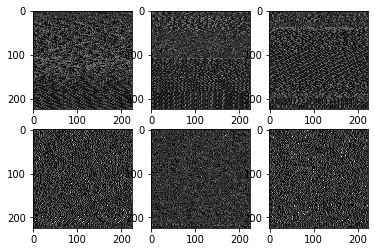

In [6]:
# Sample images from dataset
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [7]:
#loading labels
labels = np.load("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/features/labels.npy")
labels.shape

(10868,)

In [8]:
features=np.load('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/features/MobileNetV3_Large_feat_asm_microsoft_4096.npy')

In [9]:
features.shape

(10868, 4096)

Classification using MLP(Multi Layer Perceptron)¶

In [10]:
import pandas as pd
import disarray as da
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, matthews_corrcoef, roc_curve, auc

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.21, random_state=42)

In [12]:
print("X_Train:", X_train.shape)
print("Y_Train:", y_train.shape)
print("X_Test:", X_test.shape)
print("Y_Test:", y_test.shape)

X_Train: (8585, 4096)
Y_Train: (8585,)
X_Test: (2283, 4096)
Y_Test: (2283,)


In [13]:
%%time
clf = MLPClassifier(random_state=31, max_iter=700)

CPU times: user 35 µs, sys: 28 µs, total: 63 µs
Wall time: 95.6 µs


In [14]:
%%time
clf.fit(X_train,y_train)

CPU times: user 1h 45min 47s, sys: 1h 44min 23s, total: 3h 30min 10s
Wall time: 3min 17s


MLPClassifier(max_iter=700, random_state=31)

In [15]:
print("Testing Accuracy:", round((clf.score(X_test, y_test) * 100), 2))

Testing Accuracy: 90.58


In [16]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 1.05 s, sys: 979 ms, total: 2.03 s
Wall time: 31.8 ms


In [17]:
%%time
ls = precision_recall_fscore_support(y_test, y_pred, average='micro')
print(int(round(ls[0]*100, 0)), int(round(ls[1]*100, 0)), int(round(ls[2]*100, 0)))

91 91 91
CPU times: user 202 ms, sys: 251 ms, total: 453 ms
Wall time: 7.13 ms


In [18]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       233
         1.0       0.88      0.99      0.93        72
         2.0       0.95      0.97      0.96       610
         3.0       0.90      0.93      0.92       493
         4.0       0.91      0.92      0.91       242
         5.0       0.95      0.94      0.94       339
         6.0       0.29      0.67      0.40         3
         7.0       0.81      0.75      0.78       169
         8.0       0.75      0.69      0.72       122

    accuracy                           0.91      2283
   macro avg       0.81      0.85      0.82      2283
weighted avg       0.91      0.91      0.91      2283



In [19]:
# GridSearchCV

In [20]:
%%time
# Perform cross-validation and grid search to find the best hyperparameters
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

CPU times: user 0 ns, sys: 974 µs, total: 974 µs
Wall time: 27.9 µs


In [21]:
%%time
gs = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

CPU times: user 29min 42s, sys: 27min 3s, total: 56min 45s
Wall time: 10min 16s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=700, random_state=31),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [22]:
print("Best hyperparameters:", gs.best_params_)

Best hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [23]:
# to be added in remaining code

print("Accuracy on testing set: {:.3f}".format(gs.score(X_test, y_test)))

Accuracy on testing set: 0.910


In [24]:
y_pred = gs.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       219
         1.0       0.95      0.90      0.92        81
         2.0       0.95      0.97      0.96       624
         3.0       0.90      0.92      0.91       507
         4.0       0.93      0.93      0.93       245
         5.0       0.93      0.95      0.94       332
         6.0       0.50      0.14      0.22         7
         7.0       0.80      0.85      0.82       156
         8.0       0.77      0.62      0.68       112

    accuracy                           0.91      2283
   macro avg       0.85      0.79      0.81      2283
weighted avg       0.91      0.91      0.91      2283



In [25]:
list_fams = sorted(label_dict.keys())

In [26]:
list_fams.pop(0)

'.ipynb_checkpoints'

In [27]:
list_fams

['Gatak',
 'Kelihos_ver1',
 'Kelihos_ver3',
 'Lollipop',
 'Obfuscator.ACY',
 'Ramnit',
 'Simda',
 'Tracur',
 'Vundo']

In [29]:
classification_metrices = metrics.classification_report(y_test, y_pred, output_dict=True, target_names= list_fams)
df = pd.DataFrame(classification_metrices).transpose()
df.to_csv('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/4096/plots/MobileNetV3_large_MLP_asm_4096.csv')

Plotting the confusion matrix


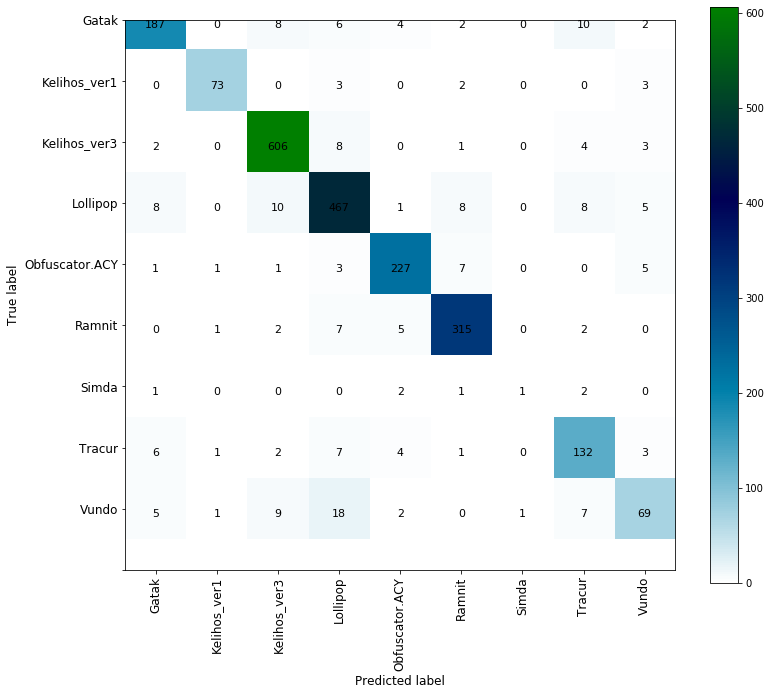

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Plotting the confusion matrix")
conf_mat = np.around(conf_matrix, decimals=2)  
figure = plt.gcf()
figure.set_size_inches(11, 10)
plt.imshow(conf_mat, interpolation='nearest', cmap='ocean_r')

for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col,row), ha='center', va='top', fontsize=11)
        
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=12)
plt.yticks(range(len(list_fams)+1), list_fams, fontsize=12)

plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.tight_layout()
plt.colorbar()
plt.savefig('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/4096/plots/MobileNetV3_large_MLP_asm.eps', bbox_inches='tight')
plt.savefig('/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/4096/plots/MobileNetV3_large_MLP_asm.png', bbox_inches='tight')

plt.show()

In [31]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm)

In [32]:
pd.set_option('display.max_columns', None)  # force to display any number of columns.

In [33]:
#calculating true positives, false positives, true negatives and false negatives from confusion matrix
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [34]:
FP, FN, TP, TN

(array([23,  4, 32, 52, 18, 22,  1, 33, 21]),
 array([32,  8, 18, 40, 18, 17,  6, 24, 43]),
 array([187,  73, 606, 467, 227, 315,   1, 132,  69]),
 array([2041, 2198, 1627, 1724, 2020, 1929, 2275, 2094, 2150]))

In [35]:
#calculating false_omission_rate
NPV = TN/(TN+FN)
FOR = 1-NPV
FOR

array([0.01543657, 0.00362647, 0.01094225, 0.02267574, 0.00883219,
       0.00873587, 0.00263043, 0.01133144, 0.01960784])

In [36]:
data = df.da.export_metrics(metrics_to_include=['true_positive_rate', 'true_negative_rate', 'false_positive_rate', 
                                              'false_negative_rate', 'false_discovery_rate'])

In [37]:
for num, fam in zip(range(25), list_fams):
    data.rename(columns={data.columns[num]:fam}, inplace=True)

data1 = data.drop(columns=['micro-average'])
data1 = data1.T
# data.drop(df.tail(1).index,inplace=True)

data1['false_omission_rate'] = list(FOR)

data1

,true_positive_rate,true_negative_rate,false_positive_rate,false_negative_rate,false_discovery_rate,false_omission_rate
Gatak,0.853881,0.988857,0.011143,0.146119,0.109524,0.015437
Kelihos_ver1,0.901235,0.998183,0.001817,0.098765,0.051948,0.003626
Kelihos_ver3,0.971154,0.980711,0.019289,0.028846,0.050157,0.010942
Lollipop,0.921105,0.970721,0.029279,0.078895,0.100193,0.022676
Obfuscator.ACY,0.926531,0.991168,0.008832,0.073469,0.073469,0.008832
Ramnit,0.948795,0.988724,0.011276,0.051205,0.065282,0.008736
Simda,0.142857,0.999561,0.000439,0.857143,0.500000,0.002630
Tracur,0.846154,0.984485,0.015515,0.153846,0.200000,0.011331
Vundo,0.616071,0.990327,0.009673,0.383929,0.233333,0.019608


In [38]:
for i in data1:
    print('Average of', i, '-->', round((np.average(data1[i])*100), 4))

Average of true_positive_rate --> 79.1976
Average of true_negative_rate --> 98.8082
Average of false_positive_rate --> 1.1918
Average of false_negative_rate --> 20.8024
Average of false_discovery_rate --> 15.3767
Average of false_omission_rate --> 1.1535


In [39]:
#MCC value
print('MCC Score:', round(matthews_corrcoef(y_test, y_pred), 2))

MCC Score: 0.89


In [40]:
print("micro_precision :", metrics.precision_score(y_test, y_pred, average='micro'))
print("micro_recall :", metrics.recall_score(y_test, y_pred, average='micro'))
print("micro_f1_score :", metrics.f1_score(y_test, y_pred, average='micro'))

micro_precision : 0.9097678493210688
micro_recall : 0.9097678493210688
micro_f1_score : 0.9097678493210688


In [41]:
print("macro_precision :", metrics.precision_score(y_test, y_pred, average='macro'))
print("macro_recall :", metrics.recall_score(y_test, y_pred, average='macro'))
print("macro_f1_score :", metrics.f1_score(y_test, y_pred, average='macro'))

macro_precision : 0.8462326778100708
macro_recall : 0.7919758266259169
macro_f1_score : 0.8069569256766767


In [42]:
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))  
y_test = enc.transform(y_test.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1))

In [43]:
y_test = y_test.toarray()
y_pred = y_pred.toarray()

In [44]:
n_classes = 9

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

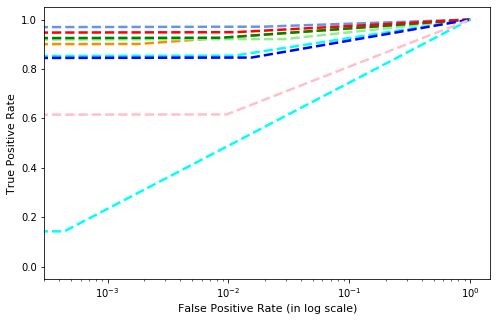

In [45]:
# Compute macro-average ROC curve and ROC area

n_classes = 9
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2.5   # line width
plt.figure(figsize=(8,5))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen', 'green', 'red', 'cyan', 'blue', 
                 'pink', 'purple', 'brown', 'coral', 'chocolate', 'indigo', 'navy'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='dashed', lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xscale("log")
plt.xlabel('False Positive Rate (in log scale)', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.savefig("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/4096/plots/MobileNetV3_large_MLP_asm_ROC.eps", bbox_inches='tight')
plt.savefig("/home/sanjeev/DL_Exp_Malware/DL_Prasad_Exp/Microsoft_PoC/after_research/4096/plots/MobileNetV3_large_MLP_asm_ROC.png", bbox_inches='tight')

plt.show()